In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba.metric import AIC_score
%matplotlib inline
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

no display found. Using non-interactive Agg backend


# CIS 9660 – Group Project – Green Team – Lending Club 

<b>Team members</b>: Aryana Apanaska, Chandrika Surajpal, Xinyue Chen, Joseph Smith, and Daniel De Oliveira Souza

<b>Description of the project</b>: LendingClub was an American peer-to-peer lending company which operated from 2006 to 2020. Borrowers could apply for unsecured personal loans between $1000 and $40000 for a standard 3-year or 5-year period. The dataset below shows all of the company’s loan data for loans that originated in 2016 and 2017. The purpose of the project is to predict the likelihood of loan default based on the attributes of the dataset.  

<b>Identifying the business problem</b>: Lending Club provides loans to borrowers with the expectation that the borrower will pay back the loan on time, in full, with the agreed-upon interest. However, if the borrower is unable to repay the loan, then Lending Club loses both the outstanding loan amount and anticipated interest on that amount. This is especially problematic for lending institutions since these are unsecured loans, and as such, the loss cannot be recovered; the borrower isn’t required to provide surety/collateral. It is imperative that the model is robust since the issuance of the loan is based solely on the creditworthiness of the borrower.  

We will use loan data from Lending Club to predict the likelihood of a loan defaulting based on the attributes found in the dataset. Despite its peer to peer nature, we anticipate that this model will be generalizable to any short term lending institution which can implement it in order to mitigate risk.  

<b>Data available</b>: https://www.kaggle.com/husainsb/lendingclub-issued-loans 

<b>Number of instances</b>: The dataset above contains 750,000+ instances, but for the purpose of this project, we plan to use a subset of this dataset that contains no missing values. 

<b>Number of features</b>: There are 72 features in the dataset, but we will identify and use the features which are the most significant contributors to our models.

<b>Missing values</b>? N/A

<b>Target variable</b>: Loan Status. 

<b>BinaryCategories</b> = Charged Off, Current, Default, Fully Paid, In Grace Period, Late (16-30 days), and (Late 31-120 days). <br>We will aggregate categories and recode to binary by separating accounts in good standing from those which are not, in order to conduct classification.

<b>Classification task or regression?</b> Classification. <br>We will develop models using, at minimum, decision tree and logistic regression techniques. 

<h2>The next Variables were chosen for the analysis</h2>
<li><b>acc_now_delinq</b> - The number of accounts on which the borrower is now delinquent.</li>
<li><b>annual_inc</b> - The self-reported annual income provided by the borrower during registration.</li>
<li><b>application_type</b> - Indicates whether the loan is an individual application or a joint application with two co-borrowers</li>
<li><b>delinq_2yrs</b> - The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years</li>
<li><b>dti</b> - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</li>
<li><b>emp_length</b> - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</li>
<li><b>grade</b> - LC assigned loan grade</li>
<li><b>home_ownership</b> - The home ownership status provided by the borrower during registration or obtained from the credit report. 
      <ul><li><em>Our <b>home_ownership</b> values are:</em></li>  
          <ul><li>RENT</li>
          <li>OWN </li>
          <li>MORTGAGE</li>
          <li>OTHER</li></ul>
       </ul>
<li><b>inq_last_12m</b> - Number of credit inquiries in past 12 months</li>
<li><b>int_rate</b> - Interest Rate on the loan</li>
<li><b>loan_amnt</b> - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</li>
<li><b>loan_status</b> - Current status of the loan</li>
<li><b>mths_since_last_major_derog</b> - Months since most recent 90-day or worse rating</li>
<li><b>open_acc</b> - The number of open credit lines in the borrower’s credit file.</li>
<li><b>term</b> - The number of payments on the loan. Values are in months and can be either 36 or 60.</li>
<li><b>tot_coll_amt</b> - Total collection amounts ever owed</li>
<li><b>tot_cur_bal</b> - Total current balance of all accounts</li>
<li><b>verification_status</b> - Indicates if income was verified by LC, not verified, or if the income source was verified</li>

In [2]:
#path = r'C:\\Users\\xinyu\\Desktop\\Baruch Class\\CIS 9660\\TEAM GREEN'
#os.chdir(path)
#!pip install graphviz
#import os
#os.environ["path"]+=os.pathsep+ 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'
path = r'C:\Users\Chandrika Surajpal\Desktop\data mining class files\project'
os.chdir(path)
#df = pd.read_csv('lc_2016_2017.csv',low_memory=False)
df = pd.read_csv('lc_2016_2017.csv',low_memory=False)


In [3]:
#Features of our dataset
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_de

In [4]:
print('Dollar amount of all loans granted during 2016-2017:',"${:,.2f}".format(df['funded_amnt'].sum())) 

Dollar amount of all loans granted during 2016-2017: $11,168,144,650.00


### Lending Club's 2016 - 2017 lending profile

In [5]:
print('Outstanding amount of defaulted loans is:',"${:,.2f}".format(df[df['loan_status']=='Default']['out_prncp'].sum())) 
print('Outstanding amount of loans in grace period',"${:,.2f}".format(df[df['loan_status']=='In Grace Period']['out_prncp'].sum()))
print('Outstanding amount of 31-120 day late loans is:',"${:,.2f}".format(df[df['loan_status']=='Late (31-120 days)']['out_prncp'].sum())) 
print('Outstanding amount of 16-30 day late loans is:',"${:,.2f}".format(df[df['loan_status']=='Late (16-30 days)']['out_prncp'].sum())) 

Outstanding amount of defaulted loans is: $402,248.84
Outstanding amount of loans in grace period $82,597,998.93
Outstanding amount of 31-120 day late loans is: $187,086,723.16
Outstanding amount of 16-30 day late loans is: $46,923,196.45


# 1. Exploratory data analysis

In [6]:
#Size of our dataset - we start out with 71 features and 793,338 instances
df.shape

(759338, 72)

Our team whittled down the 72 features after discussing each in context of whether we believe that feature may play 
a role in loan repayment. Team member Joseph Smith works in the banking industry, and as our subject-matter expert was able to provide insight which helped us to use the 17 features below to develop a base model, with loan_status as our response variable.

In [7]:
#Copy 18 features of interest into a new dataframe titled lc_df
lc_df = df[['acc_now_delinq','annual_inc','application_type','delinq_2yrs','dti','emp_length','grade',
            'home_ownership','inq_last_12m','int_rate','loan_amnt','loan_status','mths_since_last_major_derog',
            'open_acc','term','tot_coll_amt','tot_cur_bal','verification_status' ]].copy()

In [8]:
#The first five observations
lc_df.head()

,acc_now_delinq,annual_inc,application_type,delinq_2yrs,dti,emp_length,grade,home_ownership,inq_last_12m,int_rate,loan_amnt,loan_status,mths_since_last_major_derog,open_acc,term,tot_coll_amt,tot_cur_bal,verification_status
0,0,10000.0,Individual,0,21.61,NaN,C,OWN,2.0,12.62,2300,Current,NaN,4,36 months,0.0,3911.0,Not Verified
1,0,94000.0,Individual,0,25.61,10+ years,C,MORTGAGE,1.0,12.62,16000,Current,NaN,9,60 months,0.0,234457.0,Not Verified
2,0,46350.0,Individual,0,8.88,7 years,C,MORTGAGE,3.0,15.05,6025,Current,NaN,11,36 months,0.0,121311.0,Not Verified
3,0,44000.0,Individual,0,27.06,10+ years,B,RENT,1.0,9.44,20400,Current,NaN,15,36 months,0.0,62335.0,Source Verified
4,0,85000.0,Individual,1,6.79,10+ years,B,MORTGAGE,0.0,11.99,13000,Current,16.0,5,36 months,0.0,15332.0,Source Verified


In [9]:
lc_df.shape

(759338, 18)

In [10]:
lc_df.dtypes

acc_now_delinq                   int64
annual_inc                     float64
application_type                object
delinq_2yrs                      int64
dti                            float64
emp_length                      object
grade                           object
home_ownership                  object
inq_last_12m                   float64
int_rate                       float64
loan_amnt                        int64
loan_status                     object
mths_since_last_major_derog    float64
open_acc                         int64
term                            object
tot_coll_amt                   float64
tot_cur_bal                    float64
verification_status             object
dtype: object

In [11]:
#Conversion of object datatypes to categorical
for col in lc_df.columns:
    if lc_df[col].dtypes=='object':
        lc_df[col]=df[col].astype('category')

In [12]:
lc_df.dtypes

acc_now_delinq                    int64
annual_inc                      float64
application_type               category
delinq_2yrs                       int64
dti                             float64
emp_length                     category
grade                          category
home_ownership                 category
inq_last_12m                    float64
int_rate                        float64
loan_amnt                         int64
loan_status                    category
mths_since_last_major_derog     float64
open_acc                          int64
term                           category
tot_coll_amt                    float64
tot_cur_bal                     float64
verification_status            category
dtype: object

#### 1.b. Duplicates

In [13]:
#Dataset has zero duplicate rows
lc_df[lc_df.duplicated()].shape

(0, 18)

In [14]:
lc_df.isna().sum()

acc_now_delinq                      0
annual_inc                          0
application_type                    0
delinq_2yrs                         0
dti                               355
emp_length                      50363
grade                               0
home_ownership                      0
inq_last_12m                       62
int_rate                            0
loan_amnt                           0
loan_status                         0
mths_since_last_major_derog    544233
open_acc                            0
term                                0
tot_coll_amt                        0
tot_cur_bal                         0
verification_status                 0
dtype: int64

In [15]:
# re-coding na values in mths_since_last_major_derog to 0
lc_df["mths_since_last_major_derog"].fillna(0, inplace = True)

In [16]:
lc_df.isna().sum()

acc_now_delinq                     0
annual_inc                         0
application_type                   0
delinq_2yrs                        0
dti                              355
emp_length                     50363
grade                              0
home_ownership                     0
inq_last_12m                      62
int_rate                           0
loan_amnt                          0
loan_status                        0
mths_since_last_major_derog        0
open_acc                           0
term                               0
tot_coll_amt                       0
tot_cur_bal                        0
verification_status                0
dtype: int64

#### 1.b. Missing Values - Removal

In [17]:
#Drop instances with NA values and checking new size
lc_df.dropna(inplace=True)
lc_df.shape

(708912, 18)

In [18]:
#A check to ensure that missing values were removed from dataset 
lc_df.isna().sum()

acc_now_delinq                 0
annual_inc                     0
application_type               0
delinq_2yrs                    0
dti                            0
emp_length                     0
grade                          0
home_ownership                 0
inq_last_12m                   0
int_rate                       0
loan_amnt                      0
loan_status                    0
mths_since_last_major_derog    0
open_acc                       0
term                           0
tot_coll_amt                   0
tot_cur_bal                    0
verification_status            0
dtype: int64

<h2>Feature Engineering</h2>
<em>Target variable</em> is loan status: <b>'default'</b>.  
<ul>
    <li>Categories 'Charged Off' and 'Default' will be coded as 1.</li>  
    <li>'Fully Paid' will be coded as 0.</li>
    <li>All other categories will be dropped from the dataset</li>
</ul>

In [19]:
#Checking the counts in each loan_status category. These will be aggregated to binary as response.
lc_df.loan_status.value_counts()

Current               527698
Fully Paid            123255
Charged Off            33894
Late (31-120 days)     14196
In Grace Period         6273
Late (16-30 days)       3561
Default                   35
Name: loan_status, dtype: int64

In [20]:
#Selecting the response categories needed from the full dataset. 
#Of interest are 'Fully Paid' and 'Charged Off' and 'Default'
response = ['Current','Late (31-120 days)','In Grace Period','Late (16-30 days)']
lc_df.drop(lc_df[lc_df['loan_status'].isin(response)].index, inplace=True)

In [21]:
#Adding a new column 'default' to store the recoded values of 1 and 0 from the 'loan_status' column, then dropping 
#'loan_status' column
default = {'Fully Paid': 0,'Charged Off': 1, 'Default': 1}
lc_df['default'] = [default[item] for item in lc_df['loan_status']]

In [22]:
lc_df.drop(columns=['loan_status'],inplace=True)

<h2>Feature Engineering</h2> 
converting categorial length of employment to numeric

In [23]:
employment_length = {'< 1 year': 0,'1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, 
                     '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10 }
lc_df['emp_length'] = [employment_length[item] for item in lc_df['emp_length']]

In [24]:
#New dataset structure
lc_df.dtypes

acc_now_delinq                    int64
annual_inc                      float64
application_type               category
delinq_2yrs                       int64
dti                             float64
emp_length                        int64
grade                          category
home_ownership                 category
inq_last_12m                    float64
int_rate                        float64
loan_amnt                         int64
mths_since_last_major_derog     float64
open_acc                          int64
term                           category
tot_coll_amt                    float64
tot_cur_bal                     float64
verification_status            category
default                           int64
dtype: object

<h3>1.d. Outliers</h3>

Text(0.5, 0, 'Annual Income')

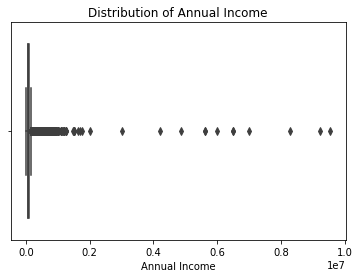

In [25]:
#Annual income feature has extreme outliers on the right tail of the distribution
sns.boxplot(lc_df['annual_inc'])
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')

In [26]:
#Outliers were identifed and removed using the 1.5*IQR convention developed by John Tukey
Q1 = lc_df['annual_inc'].quantile(0.25)
Q3 = lc_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
without_inc_outliers = lc_df[~((lc_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(lc_df['annual_inc'] > (Q3 + 1.5 * IQR)))]
without_inc_outliers.shape

(149648, 18)

Text(0.5, 0, 'Balance')

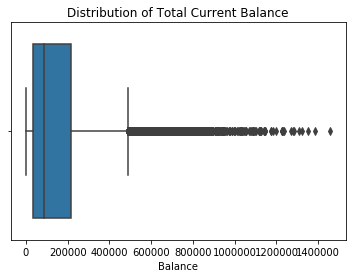

In [27]:
#Total Current Balance feature also has outliers in the right tail, though not as extreme as Annual Income
sns.boxplot(without_inc_outliers['tot_cur_bal'])
plt.title('Distribution of Total Current Balance')
plt.xlabel('Balance')

In [28]:
Q1 = without_inc_outliers['tot_cur_bal'].quantile(0.25)
Q3 = without_inc_outliers['tot_cur_bal'].quantile(0.75)
IQR = Q3 - Q1
without_inc_and_bal_outliers = without_inc_outliers[~((without_inc_outliers['tot_cur_bal'] < (Q1 - 1.5 * IQR)) |(without_inc_outliers['tot_cur_bal'] > (Q3 + 1.5 * IQR)))]
without_inc_and_bal_outliers.shape

(145980, 18)

Text(0.5, 0, 'Ratio Values')

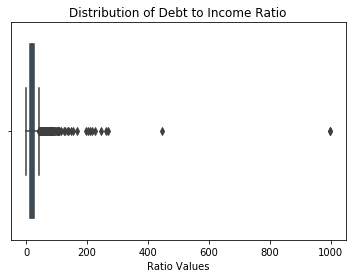

In [29]:
#Total Current Balance feature also has outliers in the right tail, though not as extreme as Annual Income
sns.boxplot(without_inc_and_bal_outliers['dti'])
plt.title('Distribution of Debt to Income Ratio')
plt.xlabel('Ratio Values')

In [30]:
Q1 = without_inc_and_bal_outliers['dti'].quantile(0.25)
Q3 = without_inc_and_bal_outliers['dti'].quantile(0.75)
IQR = Q3 - Q1
without_inc_bal_and_dti_outliers = without_inc_and_bal_outliers[~((without_inc_and_bal_outliers['dti'] < (Q1 - 1.5 * IQR)) |(without_inc_and_bal_outliers['dti'] > (Q3 + 1.5 * IQR)))]
without_inc_bal_and_dti_outliers.shape

(145258, 18)

In [31]:
#Resaving dataframe after removing outliers for the features 'annual_inc', 'tot_cur_bal', and 'dti'
lc_df=without_inc_bal_and_dti_outliers
lc_df.shape

(145258, 18)

<h3>1. a. Frequency of the target variable</h3> 
(done after '1.b' and '1.d' to get a better understadning of frequency after data was cleaned)

In [32]:
#Target values for logistic model
lc_df['default'].value_counts()

0    113383
1     31875
Name: default, dtype: int64

In [33]:
ratio = [*range(0, 44, 1)] 
meandefault = [None] * 44
for x in range(0,44):
    meandefault[x] = lc_df[lc_df['dti']>x]['default'].mean()

Text(0, 0.5, '% of loans that defaulted')

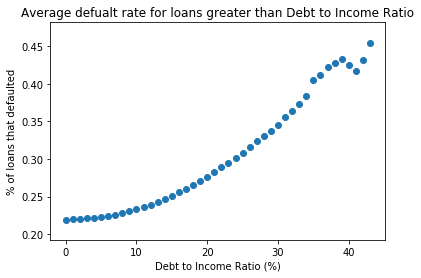

In [34]:
plt.scatter(ratio,meandefault)
plt.title('Average defualt rate for loans greater than Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio (%)')
plt.ylabel('% of loans that defaulted')

The dataset is unbalanced, balance by separating by default status, sampling from the larger category and selecting size n = number of instances in smaller category

In [35]:
#From: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb
shuffled_df = lc_df.sample(frac=1,random_state=4)
default_df = shuffled_df.loc[shuffled_df['default'] == 1]
nondefault_df = shuffled_df.loc[shuffled_df['default'] == 0].sample(n=31875,random_state=42)
normalized_df = pd.concat([nondefault_df, default_df])
normalized_df.shape

(63750, 18)

In [36]:
lc_df=normalized_df
lc_df.shape

(63750, 18)

In [37]:
#Check that balancing was implemented correctly
lc_df['default'].value_counts()

1    31875
0    31875
Name: default, dtype: int64

<h3>1.c. Relationship between variables</h3>
e.g., correlation matrix, scatterplots between important variables

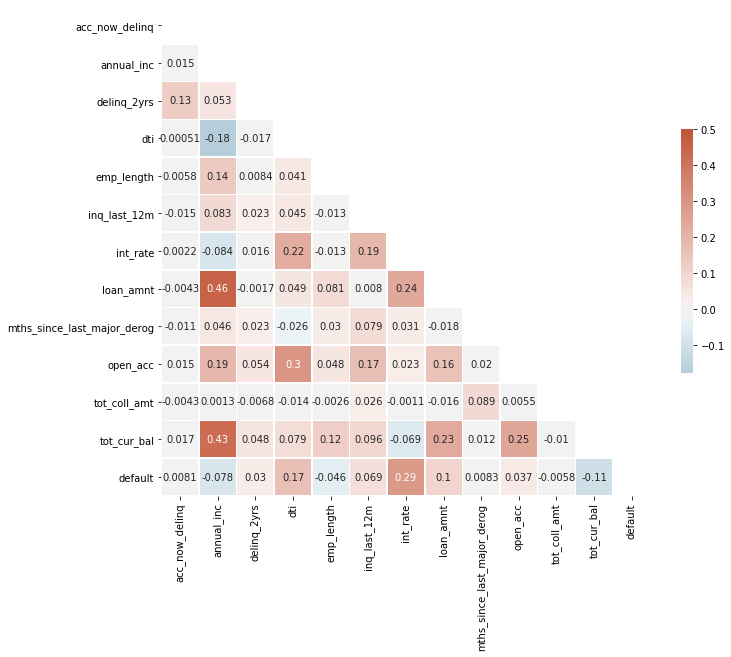

In [38]:
#From https://seaborn.pydata.org/examples/many_pairwise_correlations.html 
# Compute the correlation matrix
corr = lc_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, annot = True,linewidths=.5, cbar_kws={"shrink": .5})

Correlation heatmap shows mild positive correlation between:  
<ul>
    <li><b>loan_amnt</b> and <b>annual_inc</b> - The higher the loan amount the higher the annual income</li>
    <li><b>tot_cur_bal</b> and <b>annual_inc</b> - The total current balance the higher the annual income</li>
    <li><b>open_acc</b> and <b>dti</b> - The higher the number of open credit lines in the borrower’s credit file, the higher the debt-to-income ratio</li>
</ul>
Correlation heatmap also shows mild negative correlation between:  
<ul><li><b>months_since_last_major_derog</b> and <b>delinq_2yrs</b> - the higher the number of months since most recent 90-day or worse rating, the number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years</li><ul>

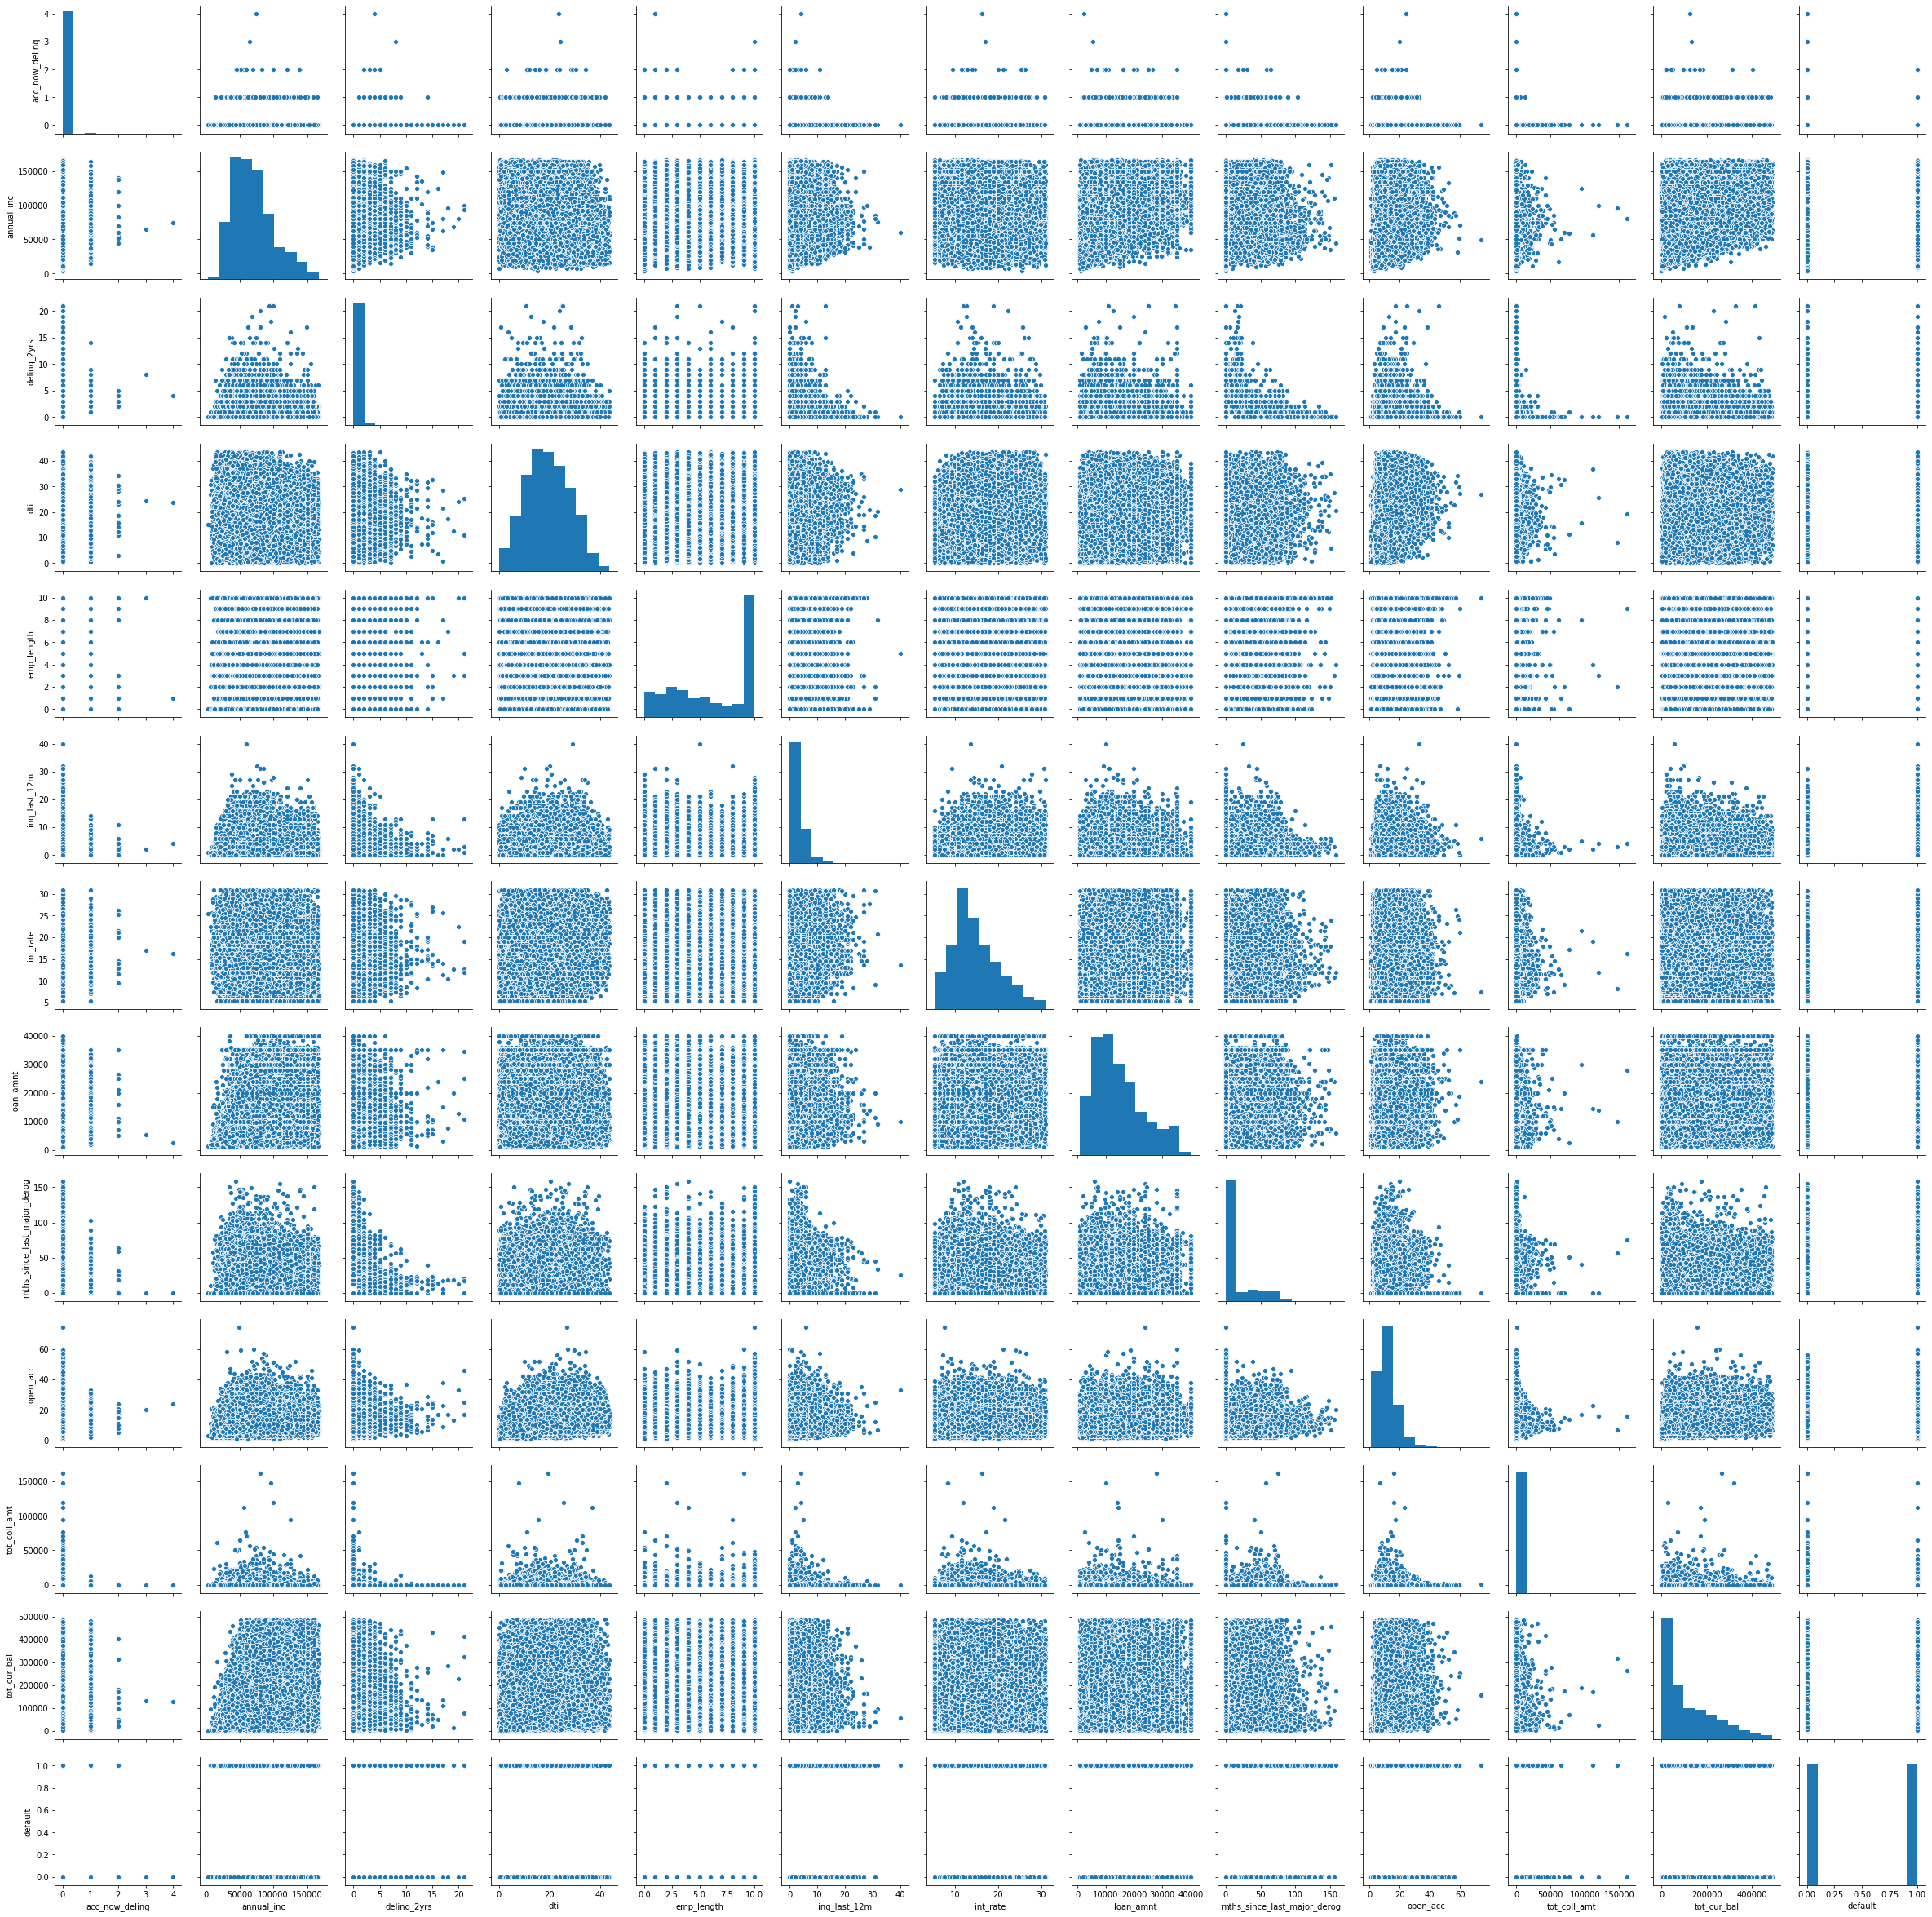

In [39]:
sns.pairplot(lc_df)

Correlation heatmap shows mild positive correlation between:  
<ul>
    <li><b>loan_amnt</b> and <b>annual_inc</b> - The higher the loan amount the higher the annual income</li>
    <li><b>tot_cur_bal</b> and <b>annual_inc</b> - The total current balance the higher the annual income</li>
    <li><b>open_acc</b> and <b>dti</b> - The higher the number of open credit lines in the borrower’s credit file, the higher the debt-to-income ratio</li>
</ul>
Correlation heatmap also shows mild negative correlation between:  
<ul><li><b>months_since_last_major_derog</b> and <b>delinq_2yrs</b> - the higher the number of months since most recent 90-day or worse rating, the number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years</li><ul>

Text(0, 0.5, 'Interest Rate')

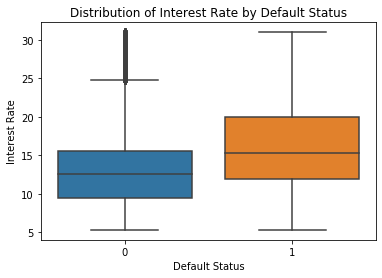

In [40]:
#Distrubution of interest rates for borrowers who repaid, versus those who did not.
sns.boxplot(data=lc_df, x='default',y='int_rate')
plt.title('Distribution of Interest Rate by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Interest Rate')

Borrowers who defaulted tended to have a higher interest rate loan.

In [41]:
print(lc_df[lc_df['default']==1]['int_rate'].describe())
print(lc_df[lc_df['default']==0]['int_rate'].describe())
print(lc_df[lc_df['default']==1]['int_rate'].median())
print(lc_df[lc_df['default']==0]['int_rate'].median())

count    31875.000000
mean        16.391100
std          5.478709
min          5.320000
25%         11.990000
50%         15.310000
75%         19.990000
max         30.990000
Name: int_rate, dtype: float64
count    31875.000000
mean        13.210318
std          5.097893
min          5.320000
25%          9.490000
50%         12.620000
75%         15.590000
max         30.990000
Name: int_rate, dtype: float64
15.31
12.62


Text(0, 0.5, 'Annual Income')

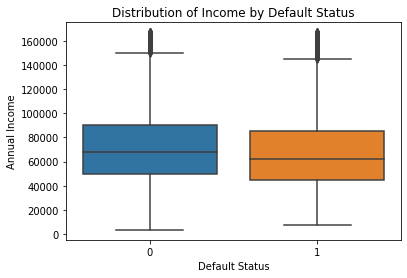

In [42]:
#Distrubution of loan amount for borrowers who repaid, versus those who did not.
sns.boxplot(data=lc_df, x='default',y='annual_inc')
plt.title('Distribution of Income by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Annual Income')

Borrowers who defaulted tended to have slightly lower income.

Text(0, 0.5, 'DTI Ratio')

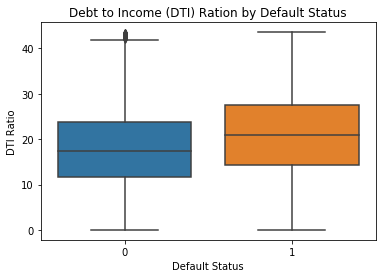

In [43]:
#Distrubution of loan amount for borrowers who repaid, versus those who did not.
sns.boxplot(data=lc_df, x='default',y='dti')
plt.title('Debt to Income (DTI) Ration by Default Status')
plt.xlabel('Default Status')
plt.ylabel('DTI Ratio')

Borrowers who defaulted tended to have a higher debt to income ratio.

In [44]:
print(lc_df[lc_df['default']==1]['annual_inc'].describe())
print(lc_df[lc_df['default']==0]['annual_inc'].describe())
print(lc_df[lc_df['default']==1]['annual_inc'].median())
print(lc_df[lc_df['default']==0]['annual_inc'].median())

count     31875.000000
mean      68147.690845
std       29944.163677
min        7261.000000
25%       45000.000000
50%       62000.000000
75%       85000.000000
max      167000.000000
Name: annual_inc, dtype: float64
count     31875.000000
mean      72869.989473
std       30616.596733
min        3400.000000
25%       50000.000000
50%       68000.000000
75%       90000.000000
max      167000.000000
Name: annual_inc, dtype: float64
62000.0
68000.0


In [45]:
print(lc_df[lc_df['default']==1]['emp_length'].describe())
print(lc_df[lc_df['default']==0]['emp_length'].describe())
print(lc_df[lc_df['default']==1]['emp_length'].median())
print(lc_df[lc_df['default']==0]['emp_length'].median())

count    31875.000000
mean         5.761161
std          3.730559
min          0.000000
25%          2.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64
count    31875.000000
mean         6.104722
std          3.717247
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64
6.0
6.0


In [46]:
print(lc_df[lc_df['default']==1]['emp_length'].describe())
print(lc_df[lc_df['default']==0]['emp_length'].describe())
print(lc_df[lc_df['default']==1]['emp_length'].median())
print(lc_df[lc_df['default']==0]['emp_length'].median())

count    31875.000000
mean         5.761161
std          3.730559
min          0.000000
25%          2.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64
count    31875.000000
mean         6.104722
std          3.717247
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64
6.0
6.0


In [47]:
print(lc_df[lc_df['default']==1]['tot_cur_bal'].describe())
print(lc_df[lc_df['default']==0]['tot_cur_bal'].describe())
print(lc_df[lc_df['default']==1]['tot_cur_bal'].median())
print(lc_df[lc_df['default']==0]['tot_cur_bal'].median())

count     31875.000000
mean     109243.920345
std      107323.321692
min           0.000000
25%       29738.500000
50%       61326.000000
75%      166894.500000
max      487850.000000
Name: tot_cur_bal, dtype: float64
count     31875.000000
mean     133977.639624
std      119546.135627
min           0.000000
25%       32659.500000
50%       93882.000000
75%      213522.000000
max      487592.000000
Name: tot_cur_bal, dtype: float64
61326.0
93882.0


In [48]:
print(lc_df[lc_df['default']==1]['loan_amnt'].describe())
print(lc_df[lc_df['default']==0]['loan_amnt'].describe())
print(lc_df[lc_df['default']==1]['loan_amnt'].median())
print(lc_df[lc_df['default']==0]['loan_amnt'].median())

count    31875.000000
mean     15613.095686
std       8947.230361
min       1000.000000
25%       8500.000000
50%      14400.000000
75%      20962.500000
max      40000.000000
Name: loan_amnt, dtype: float64
count    31875.000000
mean     13783.948235
std       8711.621439
min       1000.000000
25%       7000.000000
50%      12000.000000
75%      19850.000000
max      40000.000000
Name: loan_amnt, dtype: float64
14400.0
12000.0


In [49]:
print(lc_df[lc_df['default']==1]['mths_since_last_major_derog'].describe())
print(lc_df[lc_df['default']==0]['mths_since_last_major_derog'].describe())
print(lc_df[lc_df['default']==1]['mths_since_last_major_derog'].median())
print(lc_df[lc_df['default']==0]['mths_since_last_major_derog'].median())

print(lc_df[lc_df['default']==1]['dti'].describe())
print(lc_df[lc_df['default']==0]['dti'].describe())
print(lc_df[lc_df['default']==1]['dti'].median())
print(lc_df[lc_df['default']==0]['dti'].median())

count    31875.000000
mean        13.560627
std         23.897586
min          0.000000
25%          0.000000
50%          0.000000
75%         22.000000
max        158.000000
Name: mths_since_last_major_derog, dtype: float64
count    31875.000000
mean        13.160910
std         24.028333
min          0.000000
25%          0.000000
50%          0.000000
75%         18.000000
max        155.000000
Name: mths_since_last_major_derog, dtype: float64
0.0
0.0
count    31875.000000
mean        20.827069
std          8.753506
min          0.000000
25%         14.340000
50%         20.820000
75%         27.430000
max         43.530000
Name: dti, dtype: float64
count    31875.000000
mean        17.932153
std          8.315574
min          0.000000
25%         11.740000
50%         17.370000
75%         23.845000
max         43.420000
Name: dti, dtype: float64
20.82
17.37


In [50]:
default_sources = (lc_df[lc_df['default']==1]).groupby('home_ownership')['default'].count()
nondefault_sources = (lc_df[lc_df['default']==0]).groupby('home_ownership')['default'].count()
print(default_sources)
print(nondefault_sources)

home_ownership
ANY            15
MORTGAGE    12710
NONE            0
OWN          3746
RENT        15404
Name: default, dtype: int64
home_ownership
ANY            19
MORTGAGE    16497
NONE            0
OWN          3742
RENT        11617
Name: default, dtype: int64


Text(0.5, 1.0, 'default by homeownership')

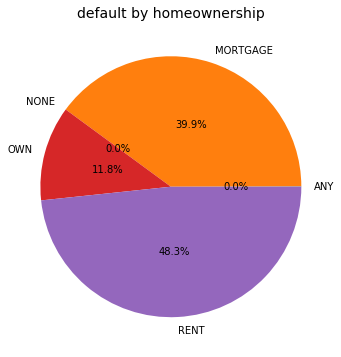

In [51]:
pie, ax = plt.subplots(figsize=[10,6])
labels = default_sources.keys()
plt.pie(x=default_sources, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("default by homeownership", fontsize=14)

Among those, who had default status, almost half (48.3%) customers paid rent, 39.9% homeowners paid mortgage and 11.8% - owned their real estate.

Text(0.5, 1.0, 'non_default by homeownership')

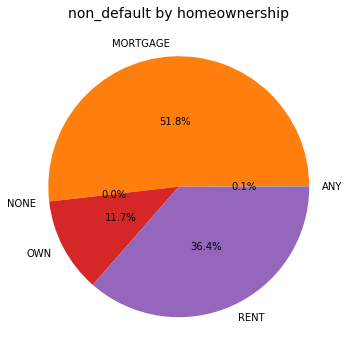

In [52]:
pie, ax = plt.subplots(figsize=[10,6])
labels = nondefault_sources.keys()
plt.pie(x=nondefault_sources, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("non_default by homeownership", fontsize=14)

Among those, who had non_default status, half (51.4%) homeowners paid mortgage, 36.4% customers paid rent and 11.7% - owned their real estate.

<BarContainer object of 7 artists>

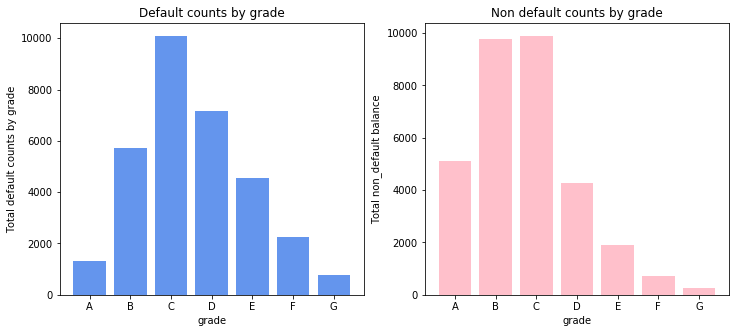

In [53]:
plt.rc('figure', figsize=(12, 5))

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
default_grade = lc_df[lc_df['default']==1].groupby(['grade'])['tot_cur_bal'].count()
default_grade = pd.DataFrame(default_grade)
ax1.set_title("Default counts by grade")
plt.ylabel('Total default counts by grade')
plt.xlabel('grade')
ax1.bar(default_grade.index, default_grade['tot_cur_bal'], color = 'cornflowerblue')

ax2 = fig.add_subplot(1, 2, 2)
non_default_grade = lc_df[lc_df['default']==0].groupby(['grade'])['tot_cur_bal'].count()
non_default_grade = pd.DataFrame(non_default_grade)
ax2.set_title('Non default counts by grade')
plt.ylabel('Total non_default balance')
plt.xlabel('grade')
ax2.bar(non_default_grade.index, non_default_grade['tot_cur_bal'],color = 'pink')

The loans whose grades are above C (D, E, F, G), tended to have more default counts.

# 2. 	Create a baseline model (e.g., decision tree, logistic regression, deep learning, gradient boosted trees).

The table below demonstrates and compares the metrics and the feature importance of all the models listed below.

<img src="LC_Table.png"
     />

<em>Important: to see the table, place the <u>LC_Table.png</u> file into the same folder with this notebook</em>

## Logistic Regression using all features:

In [54]:
#Create dummy variables and store in lc_df2, a copy of lc_df
lc_df2 = pd.get_dummies(lc_df, prefix_sep='_', drop_first=True)
#defining y vector and X array
y = lc_df2['default']
X = lc_df2.drop(columns=['default'])
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [55]:
lc_df2.columns

Index(['acc_now_delinq', 'annual_inc', 'delinq_2yrs', 'dti', 'emp_length',
       'inq_last_12m', 'int_rate', 'loan_amnt', 'mths_since_last_major_derog',
       'open_acc', 'tot_coll_amt', 'tot_cur_bal', 'default',
       'application_type_Joint App', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'term_60 months', 'verification_status_Source Verified',
       'verification_status_Verified'],
      dtype='object')

In [56]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -0.00561594099763207
       acc_now_delinq  annual_inc  delinq_2yrs       dti  emp_length  \
coeff        0.000175    -0.00001     0.004747  0.008779   -0.032907   

       inq_last_12m  int_rate  loan_amnt  mths_since_last_major_derog  \
coeff       0.01566  0.051915   0.000024                    -0.000381   

       open_acc  ...   grade_E   grade_F   grade_G  home_ownership_MORTGAGE  \
coeff -0.007374  ...  0.003064  0.001734  0.000373                -0.005986   

       home_ownership_NONE  home_ownership_OWN  home_ownership_RENT  \
coeff                  0.0           -0.001083             0.001457   

       term_60 months  verification_status_Source Verified  \
coeff        0.003883                            -0.001729   

       verification_status_Verified  
coeff                      0.002763  

[1 rows x 26 columns]

AIC 35678.74122272324


In [57]:
prediction_valid = logit_reg.predict(valid_X)
prediction_train = logit_reg.predict(train_X)
# precision
print("precision on test is:",precision_score(valid_y,prediction_valid))
# recall
print("recall on test is:",recall_score(valid_y,prediction_valid))
#f1
print("f1 on test is:",f1_score(valid_y,prediction_valid))
print("Logistic Regression:Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Logistic Regression:Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

precision on test is: 0.6006343452650657
recall on test is: 0.7026396692462631
f1 on test is: 0.6476451045534494
Logistic Regression:Accuracy on train is: 0.6198991596638656
Logistic Regression:Accuracy on test is: 0.6229019607843137


In [58]:
print(pd.DataFrame({'coeff': sorted(abs(logit_reg.coef_[0]),reverse=True)}, index=X.columns))

                                        coeff
acc_now_delinq                       0.051915
annual_inc                           0.032907
delinq_2yrs                          0.015660
dti                                  0.008779
emp_length                           0.007374
inq_last_12m                         0.007021
int_rate                             0.005986
loan_amnt                            0.004747
mths_since_last_major_derog          0.003883
open_acc                             0.003261
tot_coll_amt                         0.003064
tot_cur_bal                          0.002763
application_type_Joint App           0.001734
grade_B                              0.001729
grade_C                              0.001457
grade_D                              0.001083
grade_E                              0.001047
grade_F                              0.000381
grade_G                              0.000373
home_ownership_MORTGAGE              0.000327
home_ownership_NONE               

## Decision Tree Classifier

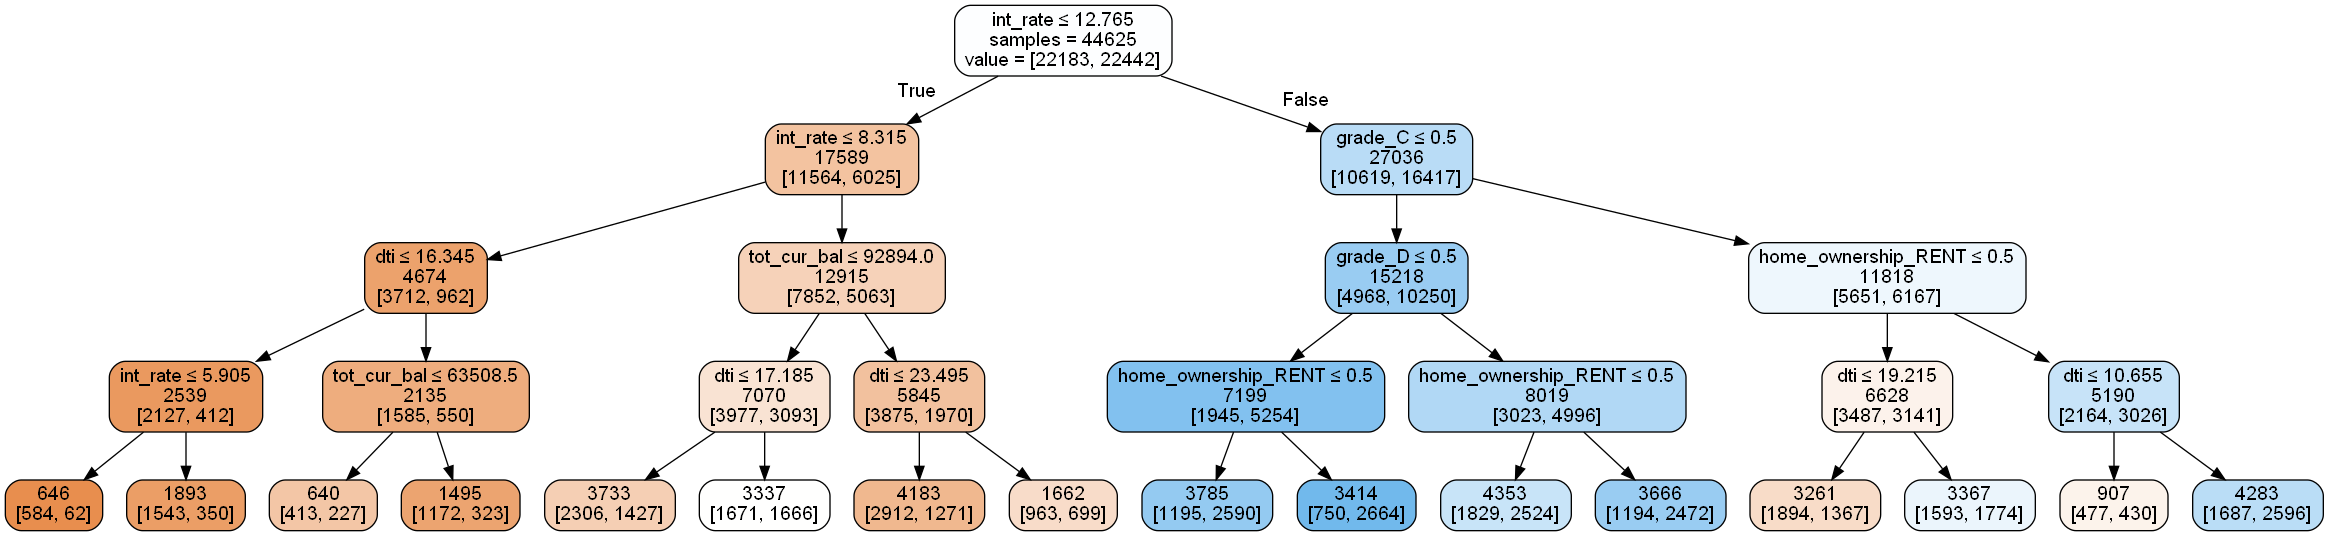

In [59]:
fullClassTree = DecisionTreeClassifier(max_depth=4,random_state = 1)
fullClassTree.fit(train_X, train_y)
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [60]:
prediction_train = fullClassTree.predict(train_X)#use the DT model to predict on the training data
prediction_valid = fullClassTree.predict(valid_X)#use the DT model to predict on the validation data
# precision
print("precision on test is:",precision_score(valid_y,prediction_valid))
# recall
print("recall on test is:",recall_score(valid_y,prediction_valid))
#f1
print("f1 on test is:",f1_score(valid_y,prediction_valid))
print("Decision Tree:Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Decision Tree:Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

precision on test is: 0.62717203536226
recall on test is: 0.654298738471324
f1 on test is: 0.6404482722839058
Decision Tree:Accuracy on train is: 0.6398879551820729
Decision Tree:Accuracy on test is: 0.6376470588235295


In [61]:
importances = fullClassTree.feature_importances_
important_df = pd.DataFrame({'feature': train_X.columns, 'importance': importances})#,"std":std})
important_df = important_df.sort_values('importance',ascending=False)
print(important_df)

                                feature  importance
6                              int_rate    0.690654
14                              grade_C    0.121638
3                                   dti    0.066033
22                  home_ownership_RENT    0.054810
15                              grade_D    0.034377
11                          tot_cur_bal    0.032488
0                        acc_now_delinq    0.000000
24  verification_status_Source Verified    0.000000
23                       term_60 months    0.000000
21                   home_ownership_OWN    0.000000
20                  home_ownership_NONE    0.000000
19              home_ownership_MORTGAGE    0.000000
18                              grade_G    0.000000
17                              grade_F    0.000000
16                              grade_E    0.000000
13                              grade_B    0.000000
1                            annual_inc    0.000000
12           application_type_Joint App    0.000000
10          

## Naive Bayes with all features

In [62]:
#Naive bayes model import
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# run naive Bayes
nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
# predict class membership
prediction_train = nb.predict(train_X)
prediction_valid = nb.predict(valid_X)
# precision
print("precision on test is:",precision_score(valid_y,prediction_valid))
# recall
print("recall on test is:",recall_score(valid_y,prediction_valid))
#f1
print("f1 on test is:",f1_score(valid_y,prediction_valid))
print("Naive Bayes:Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Naive Bayes:Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

precision on test is: 0.6078765587153494
recall on test is: 0.7183292695854977
f1 on test is: 0.6585034013605442
Naive Bayes:Accuracy on train is: 0.6315742296918767
Naive Bayes:Accuracy on test is: 0.6325228758169935


In [64]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
11,tot_cur_bal,133683.326015
1,annual_inc,72885.679350
7,loan_amnt,13778.898255
10,tot_coll_amt,293.347338
3,dti,17.952982
8,mths_since_last_major_derog,13.209890
6,int_rate,13.202630
9,open_acc,11.749358
4,emp_length,6.084073
5,inq_last_12m,2.359014


In [65]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
11,tot_cur_bal,133683.326015
1,annual_inc,72885.679350
7,loan_amnt,13778.898255
10,tot_coll_amt,293.347338
3,dti,17.952982
8,mths_since_last_major_derog,13.209890
6,int_rate,13.202630
9,open_acc,11.749358
4,emp_length,6.084073
5,inq_last_12m,2.359014


In [66]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[1]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
11,tot_cur_bal,109470.802112
1,annual_inc,68101.382897
7,loan_amnt,15578.906737
10,tot_coll_amt,253.256350
3,dti,20.797076
6,int_rate,16.346227
8,mths_since_last_major_derog,13.535024
9,open_acc,12.170439
4,emp_length,5.753320
5,inq_last_12m,2.732510


## Random Forest

In [67]:
rf = RandomForestClassifier(n_estimators = 1000, max_depth=5, random_state=0)
rf.fit(train_X, train_y)
print("precision score: ", precision_score(valid_y,rf.predict(valid_X)))
print("recall score: ", recall_score(valid_y,rf.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,rf.predict(valid_X)))
print("Random Forest:Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Random Forest:Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

precision score:  0.6320375991383531
recall score:  0.6842997985794551
f1-score:  0.6571312226407411
Random Forest:Accuracy on train is: 0.6315742296918767
Random Forest:Accuracy on test is: 0.6325228758169935


In [68]:
predictors=X.columns

In [69]:
importances = list(zip(rf.feature_importances_, predictors))
pd.DataFrame(importances, index=[x for (_,x) in importances]).iloc[:,0].sort_values(ascending = False)

int_rate                               0.407336
dti                                    0.111133
grade_E                                0.068611
grade_B                                0.064381
term_60 months                         0.042934
home_ownership_RENT                    0.042291
home_ownership_MORTGAGE                0.042156
tot_cur_bal                            0.041129
grade_D                                0.040233
grade_F                                0.034686
loan_amnt                              0.027837
grade_C                                0.027658
verification_status_Verified           0.013577
annual_inc                             0.011308
inq_last_12m                           0.005782
open_acc                               0.003956
emp_length                             0.002968
grade_G                                0.002774
delinq_2yrs                            0.002248
mths_since_last_major_derog            0.001925
tot_coll_amt                           0

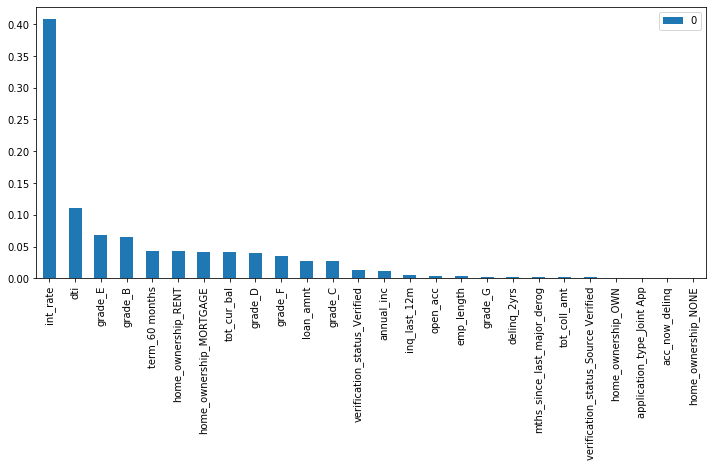

In [70]:
pd.DataFrame(importances, index=[x for (_,x) in importances]).sort_values(by = 0, ascending = False).plot(kind = 'bar')

From the plot above, we can see that interest rate has the highest importance. 

## Gradient Boosted Trees

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(train_X, train_y)
prediction_train=gbm.predict(train_X)
prediction_valid=gbm.predict(valid_X)
# precision
print("precision on test is:",precision_score(valid_y,prediction_valid))
# recall
print("recall on test is:",recall_score(valid_y,prediction_valid))
#f1
print("f1 on test is:",f1_score(valid_y,prediction_valid))
print("Gradient Boosted Trees:Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Gradient Boosted Trees:Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

precision on test is: 0.639009900990099
recall on test is: 0.6841937877663522
f1 on test is: 0.6608303895970921
Gradient Boosted Trees:Accuracy on train is: 0.6598543417366947
Gradient Boosted Trees:Accuracy on test is: 0.6535947712418301


In [72]:
importance = pd.Series(gbm.feature_importances_, predictors).sort_values(ascending=False)
pd.DataFrame(importance, index=[x for (_,x) in importances]).iloc[:,0].sort_values(ascending = False)

int_rate                               0.604406
dti                                    0.089792
loan_amnt                              0.061404
tot_cur_bal                            0.053362
grade_C                                0.036905
home_ownership_RENT                    0.032967
annual_inc                             0.023838
home_ownership_MORTGAGE                0.017651
grade_D                                0.013907
delinq_2yrs                            0.008728
inq_last_12m                           0.008693
application_type_Joint App             0.006943
open_acc                               0.006534
emp_length                             0.006238
tot_coll_amt                           0.004565
verification_status_Verified           0.004313
mths_since_last_major_derog            0.004197
verification_status_Source Verified    0.003937
grade_F                                0.003856
grade_G                                0.003486
grade_E                                0

Text(0, 0.5, 'Feature Importance Score')

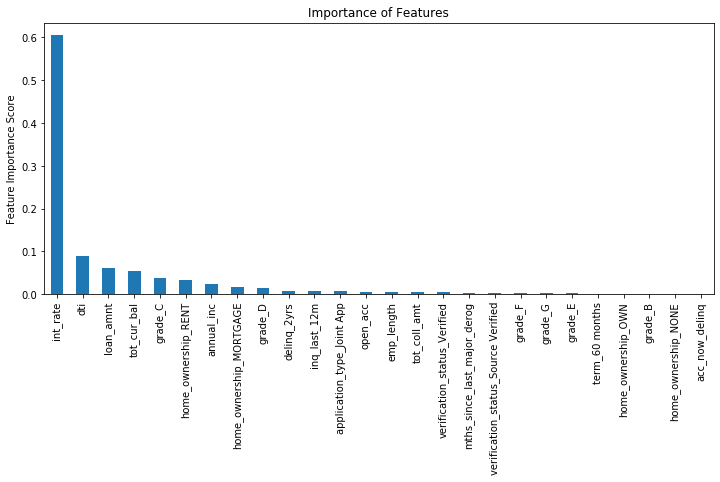

In [73]:
importance.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

As in the case of the previous model (Random Forest), in the Gradient Boosted Trees model, we observe the highest importance of the interest rate. 

## Stacking

In [74]:
#!pip install mlxtend
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
#from mlxtend import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


estimators = [
('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
('gbm', make_pipeline(StandardScaler(), GradientBoostingClassifier()))
]

clf = StackingClassifier(
estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(train_X, train_y).score(valid_X, valid_y)

print("precision score: ", precision_score(valid_y,clf.predict(valid_X)))
print("recall score: ", recall_score(valid_y,clf.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,clf.predict(valid_X)))
print("Accuracy on test is:",accuracy_score(valid_y,clf.predict(valid_X)))

precision score:  0.6413065126468831
recall score:  0.682709636382911
f1-score:  0.6613607188703465
Accuracy on test is: 0.6551633986928105


## Implementation of Grid Optimization

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
grid_param = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
grid = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1)
grid.fit(train_X, train_y)
print('Best Parameters:', grid.best_params_)
print('Score:', grid.best_score_)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 500}
Score: 0.6682118678695279


In [76]:
print("precision score: ", precision_score(valid_y,grid.predict(valid_X)))
print("recall score: ", recall_score(valid_y,grid.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,grid.predict(valid_X)))

precision score:  0.6386014267055159
recall score:  0.6738047280822644
f1-score:  0.6557309398535025


## Recommendations to Lending Club:
1. Limit loans to borrowers with DTI below 36%, in line with banking convention.
2. Negotiate lower funded amount to borrowers who the models indiciate will default, as this will also mean a lower monthly payment as a benefit to them.
3. Reach out to borrowers the model identifies as possible defaulters communicating that modification options are availble if needed.

## Recommendations to better optimize the model, the dataset needs:
1. Credit or FICO score of each Borrower at the time the the loan is issued.
2. Aggregate borrowers and coborrowers' loan data when modelling defaults.
3. Review banking models for features not used in our models.